# Homework Assignment #03
## Please do problems 2.37, 2.40, 3.11, 3.15, and 3.16 in the Curtis textbook.
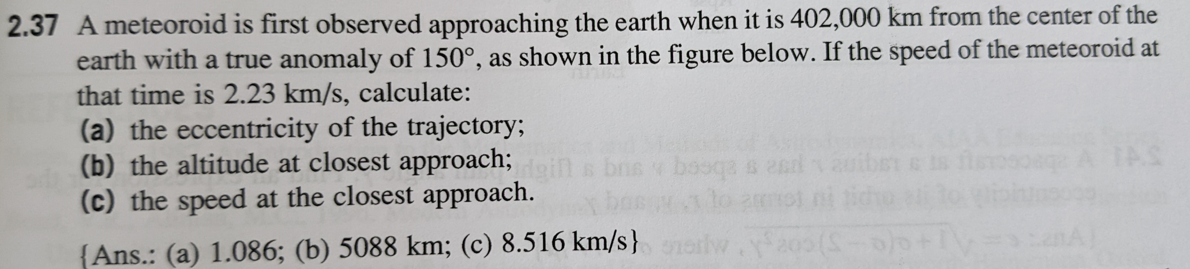

In [10]:

%reset -f
from sympy import *

mu = Symbol('mu')
r_earth = Symbol('r_earth')
theta = Symbol('theta')
v = Symbol('v')
r = Symbol('r')

values = {
    (r_earth, 6378),     # km
    ( mu, 3.986*10**5),  # km^3/s^2
    (theta, 150), # rads
    (v, 2.23),           # km/s
    (r, 402000),         # km
}

# reorganize eq.111 to calculate a:
a = (mu*r)/(r*v**2-2*mu)

print(a.subs(values).evalf())



# Reorganize eq. 2.104 to solve for e

e1 = (r*cos(theta*pi/180) + sqrt((r**2)*cos(theta*pi/180)**2 + 4*a**2 + 4*a*r))/(2*a)
e2 = (r*cos(theta*pi/180) - sqrt((r**2)*cos(theta*pi/180)**2 + 4*a**2 + 4*a*r))/(2*a)
e = print(e1.subs(values).evalf(),e2.subs(values).evalf())
e = max(e1.subs(values).evalf(),e2.subs(values).evalf())

print("(a) eccentricity is",e)

# Reorganize eq.103 to solve for h:

h = sqrt(a*mu*(e**2 - 1))

# Then calculate periapsis radius from eq. 2.101, 

r_p = (h**2)/(mu*(1+e))

# and subtract radius of earth to get altitude

a_p = r_p - r_earth

print("(b) altitude at periapsis is",a_p.subs(values).evalf(),"km")

# A quick way to get velocity at periapsis is to rearrange eq. 2.111

v_p = sqrt(mu*( (2/r_p) + (1/a)))

print("(c) velocity at periapsis is",v_p.subs(values).evalf(),"km/s")
# # calculate hyperbolic excess speed
# v_inf = (mu/a)**0.5
# print("hyperbolic excess speed",v_inf.subs(values).evalf())

133319.266784468
1.08600096318582 -3.69734304987890
(a) eccentricity is 1.08600096318582
(b) altitude at periapsis is 5087.58535469204 km
(c) velocity at periapsis is 8.51584569671997 km/s


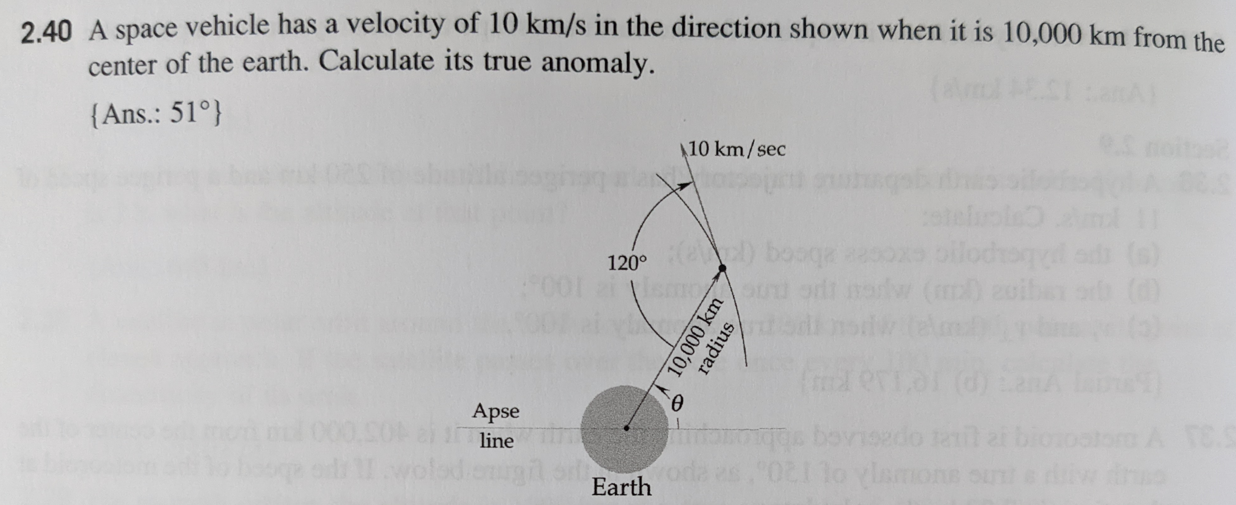

In [11]:

%reset -f
from sympy import *

mu = Symbol('mu')
r_earth = Symbol('r_earth')
angle = Symbol('angle')
v = Symbol('v')
r = Symbol('r')

values = {
    (r_earth, 6378),     # km
    ( mu, 3.986*10**5),  # km^3/s^2
    (angle, 120), # rads
    (v, 10),           # km/s
    (r, 10000),         # km
}

# reorganize eq.111 to calculate a:
a = (mu*r)/(r*v**2-2*mu)

# from the image we can get the angle above the perpedicular to determine v_perp and v_rad

v_perp = v*cos((angle - 90)*pi/180)
v_rad = v*sin((angle - 90)*pi/180)

h = r*v_perp

# rearrange eq. 2.103 to calculate e

e = sqrt(1 + (h**2)/(a*mu))

# now we rearrange eq. 2.49 to solve for true anomaly

theta = asin(h*v_rad/(mu*e))*180/pi

print("True anomaly is",theta.subs(values).evalf(),"degrees")

True anomaly is 50.9398571408521 degrees


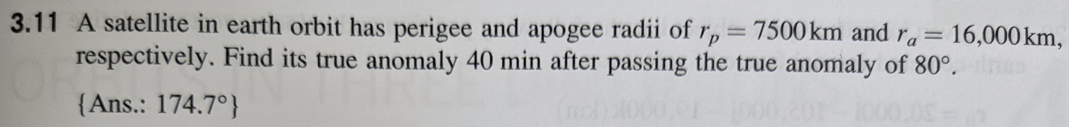

In [44]:
%reset -f
from sympy import *

mu =       Symbol('mu')
r_earth =   Symbol( 'r_earth')
r_p =     Symbol('r_p')
r_a =     Symbol('r_a')
t_delta =     Symbol('t_delta')
theta_1 =     Symbol('theta_1')

values = [
    (mu         ,3.986*10**5 ) ,    
    (r_earth    ,6378 ),            # km
    (r_p      ,7500) ,              # km
    (r_a      ,16000) ,             # km
    (theta_1      ,80*(pi/180)) ,     # radians
    (t_delta, 40*60)                # seconds
]

# calculate a and e
a = (r_a + r_p)/2
e = (r_a - r_p)/(r_a + r_p)

# we can calculate orbital period from eq. 2.83
Period = (2*pi*a**(1.5))/(mu**(0.5))
print("Period is:",Period.subs(values).evalf(),"seconds")

print("theta_1 is:",theta_1.subs(values).evalf(),"radians")

# We need to find the eccentricity anomaly E
E_1 = acos((e + cos(theta_1))/(1 + e*cos(theta_1)))
print("E_1 is:",E_1.subs(values).evalf(),"radians")

# Now we can calculate Mean anomaly with eq. 3.14
ME_1 = E_1 - e*sin(E_1)

# Now we can find t_1
t_1 = (ME_1*Period)/(2*pi)

# Our time 2 is just the delta t plus our initial time
t_2 = t_1 + t_delta

# now we use the same equation to calculate Mean anomaly 2
ME_2 = (2*pi*t_2)/Period

# Now we must use newtons method to calculate the eccentric anomaly 2

def function(E,ME):
    return E - e*sin(E) - ME

def dfunction(E):
    return 1 - e*cos(E)

def Newton_Solver( E0,ME, tol = 10e-12, max_iter = 100):
    x = E0
    for i in range(max_iter):
        fx = function(x,ME)
        fx = fx.subs(values).evalf()
        dfx = dfunction(x)
        dfx = dfx.subs(values).evalf()
        if abs(fx) < tol:
            print( 'convergence reached, x =',x)
            return x
        if dfx == 0:
            print('singularity hit: exiting')
            sys.exit(0)
        x = x - fx/dfx
        # if i % 10 == 0:
        print('newton iteration:',i,'value is currently:',x)

E_2 = Newton_Solver((pi/2).evalf(),ME_2)
print(E_2)

# Now we want the true anomaly from this eccentric anomaly, rearrange 3.10b
theta_2 = (180/pi)*acos((e - cos(E_2))/(e*cos(E_2) - 1))

print("true anomaly is",theta_2.subs(values).evalf(), t_delta.subs(values) ,"seconds after true anomaly",
      (theta_1*180/pi).subs(values).evalf())

Period is: 12675.5852680494 seconds
theta_1 is: 1.39626340159546 radians
E_1 is: 1.04290520944181 radians
newton iteration: 0 value is currently: 2.28180389230780
newton iteration: 1 value is currently: 2.21090141624111
newton iteration: 2 value is currently: 2.21032362887020
newton iteration: 3 value is currently: 2.21032358903888
convergence reached, x = 2.21032358903888
2.21032358903888
true anomaly is 142.030621707204 2400 seconds after true anomaly 80.0000000000000


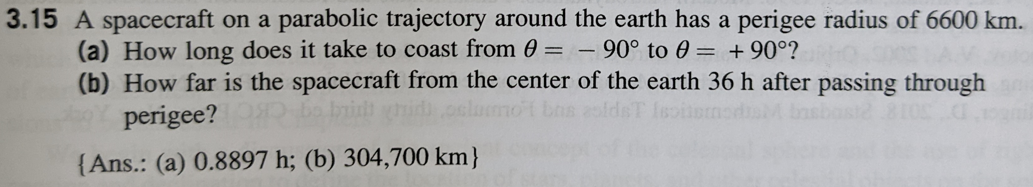

In [31]:
%reset -f
from sympy import *

mu =            Symbol('mu')
r_earth =       Symbol( 'r_earth')
r_p =           Symbol('r_p')
theta_1 =       Symbol('theta_1')
theta_2 =       Symbol('theta_2')
t_i =           Symbol('t_i')
e =           Symbol('e')

values = [
    (mu         ,3.986*10**5 ) ,    
    (r_earth    ,6378 ),            # km
    (r_p      ,6600) ,              # km
    (theta_1      ,-90*pi/180) ,     # radians
    (theta_2      ,90*pi/180) ,     # radians
    (t_i, 36*3600),                # seconds
]

# First we want to valculate velocity at periapsis using eq. 2.90
v_p = sqrt((2*mu)/r_p)

# Then we want to calculate angular momentum h
h = r_p*v_p

# Now we calculate "Mean anomaly" at theta_1 and theta_2 using eq. 3.30
ME_1 = 0.5*tan(theta_1*0.5) + (1/6)*tan(theta_1*0.5)**3
ME_2 = 0.5*tan(theta_2*0.5) + (1/6)*tan(theta_2*0.5)**3

# Now we calculate the times at these two locations
t_1 = (ME_1*h**3)/(mu**2)
t_2 = (ME_2*h**3)/(mu**2)

# The time elapsed is the difference
t_delta = t_2 - t_1
print("(a) it takes ",(t_delta/3600).subs(values).evalf(), " hours")

# we can use eq. 3.31 to calculate the mean anomaly at 36 hours after perigee
ME_i = (t_i*mu**2)/(h**3)

# Now we use eq. 3.32b to calculate the ominous z stand-in variable
z = (3*ME_i + (1 + (3*ME_i)**2)**(0.5))**(1/3)

# use equation 3.32a to find our true anomaly of interest
theta_i = 2*atan(z - 1/z)

# now we use eq. 2.45 to calculate our radius of interest
r_i = (h**2)/(mu*(1 + cos(theta_i)))

print("(b) at ",(t_i/3600).subs(values),"hours it is at",
      r_i.subs(values).evalf(), " km")


(a) it takes  0.889669056078407  hours
(b) at  36 hours it is at 304704.005459388  km


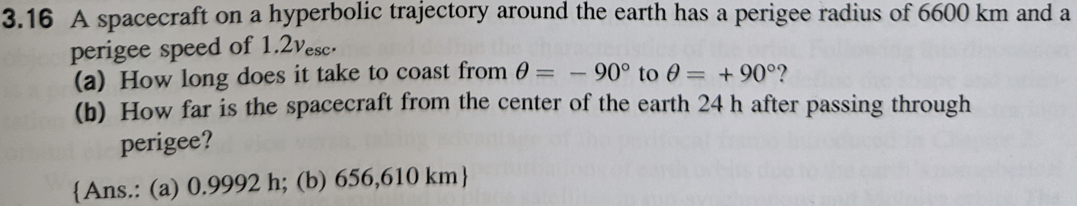

In [45]:
%reset -f
from sympy import *

mu =            Symbol('mu')
r_earth =       Symbol( 'r_earth')
r_p =           Symbol('r_p')
v_p =           Symbol('v_p')
v_esc =           Symbol('v_esc')
theta_1 =       Symbol('theta_1')
theta_2 =       Symbol('theta_2')
t_i =           Symbol('t_i')
e =           Symbol('e')

values = [
    (mu         ,3.986*10**5 ) ,    
    (r_earth    ,6378 ),            # km
    (r_p      ,6600) ,              # km
    (theta_1      ,-90*pi/180) ,     # radians
    (theta_2      ,90*pi/180) ,     # radians
    (t_i, 24*3600),                # seconds
]
# First we want to valculate velocity at periapsis using eq. 2.90
v_esc = sqrt((2*mu)/r_p)
v_p  = 1.2*v_esc

print("Velocity at periapsis:",v_p.subs(values).evalf())

# Then we want to calculate angular momentum h
h = r_p*v_p

# reorganize eq.111 to calculate a:
a = (mu*r_p)/(r_p*v_p**2-2*mu)

# rearrange eq. 2.103 to calculate e:
e = sqrt(1 + (h**2)/(a*mu))

# We rearrange eq. 3.41a to get F_1 and F_2
F_1 = -acosh((cos(theta_1) + e)/(1 + e*cos(theta_1)))
F_2 = acosh((cos(theta_2) + e)/(1 + e*cos(theta_2)))

print("F 1 and 2",F_1.subs(values).evalf(),F_2.subs(values).evalf())

# Now we calculate "Mean anomalise" at theta_1 and theta_2 using eq. 3.40
ME_1 = e*sinh(F_1) - F_1
ME_2 = e*sinh(F_2) - F_2


# Now we calculate the times at these two locations using eq. 3.34
t_1 = (ME_1*h**3)/((((e**2)-1)**(3/2))*mu**2)
t_2 = (ME_2*h**3)/((((e**2)-1)**(3/2))*mu**2)

# The time elapsed is the difference
t_delta = t_2 - t_1
print("(a) it takes ",(t_delta/3600).subs(values).evalf(), " hours \n\tto coast from",
      theta_1.subs(values).evalf(), "rads to", theta_2.subs(values).evalf(), "rads")

# functions modified for hyperbolic sine and cosine as according to eq 3.45
def function(F,ME):
    return e*sinh(F) - F - ME

def dfunction(F):
    return e*cosh(F) - 1

def Newton_Solver( F0,ME, tol = 10e-12, max_iter = 100):
    x = F0
    for i in range(max_iter):
        fx = function(x,ME)
        fx = fx.subs(values).evalf()
        dfx = dfunction(x)
        dfx = dfx.subs(values).evalf()
        if abs(fx) < tol:
            print( 'convergence reached, x =',x)
            return x
        if dfx == 0:
            print('singularity hit: exiting')
            sys.exit(0)
        x = x - fx/dfx
        if i % 10 == 0:
            print('newton iteration:',i,'value is currently:',x)


# we can use eq. 3.31 to calculate the mean anomaly at 36 hours after perigee
ME_i = (((e**2 - 1)**(3/2))*t_i*mu**2)/(h**3)
F_i = Newton_Solver((-pi/2).evalf(),ME_i)
print(F_i)

# use equation 3.41b to find our true anomaly of interest
theta_i = acos((cosh(F_i) - e)/(1 - e*cosh(F_i)))

# # now we use eq. 2.45 to calculate our radius of interest
r_i = (h**2)/(mu*(1 + e*cos(theta_i)))

print("(b) at ",(t_i/3600).subs(values),"hours after periapsis it is at",
      r_i.subs(values).evalf(), " km")

Velocity at periapsis: 13.1884246767590
F 1 and 2 -1.24472500742956 1.24472500742956
(a) it takes  0.999174090725976  hours 
to coast from -1.57079632679490 rads to 1.57079632679490 rads
newton iteration: 0 value is currently: 21.7632124972159
newton iteration: 10 value is currently: 11.7636767529167
newton iteration: 20 value is currently: 4.54539831344826
convergence reached, x = 4.54530855677668
4.54530855677668
(b) at  24 hours after periapsis it is at 656610.722106496  km
